# Hypothesis Testing

## Introduction



In this lecture we will look at hypothesis testing. In particular, we will discuss:



- What hypotheses are;

- Statistical Significance;


- P-values;

- T-tests and z-test in hypothesis testing.

Let us first import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
import numpy as np
from scipy.stats import norm

from scipy.stats import t
import matplotlib.pyplot as plt
sns.set_style("darkgrid") 


## The Hypothesis

In hypothesis testing, we make use of **statistical hypotheses** which are quantified statements about a given parameter.   

Often the hypothesis is an assumption about the population average. 

For example, we can hypothesise that the average income of NYC residents is $850,000.

If we want to test whether an hypothesis is true or not, we need two 'ingredients':

1.   **Null Hypothesis**: The null hypothesis is an assumption that the population average is identical to a specific value and that there is no statistical significance between the mean of the sample means and the population mean.  


2.  **Alternative Hypothesis:** An alternative hypothesis is the *opposite* of the null hypothesis. 

In hypothesis testing, our goal is to **reject the null hypothesis** and reject a specific claim based on the data at hand.


### Examples of Null and Alternative Hypotheses

#### Example 1

Suppose we want to test whether the average income of a New Yorker is different from $850000. 

*  **H0: $\mu =$ \$850.000** 
*  **H1: $\mu \neq$  \$850.000**

#### Example 2

Suppose that we want to test whether the average age for corona patients is lower than 67. 

*  **H0: $\mu =$ 67**  
*  **H1: $\mu < $ 67**

#### Example 3

Suppose we want to test whether blood sugar level rises if we administer a medicine (assume that the the average blood sugar level is 5.0 mmol/L). 

-  H0: $\mu $ = 5.0 mmol\/L 
-  H1: $\mu >$ 5.0 mmol/L  

#### Example 4

Suppose that we want to reject someone's claims that CO2 levels are the same as in 1965. In 1965, the CO2 levels were 320 micro mol/mol. We claim that it's much higher today then it was in 1965. 

-  H0: $\mu $ = 320
-  H1: $\mu >$ 320

### The goal of hypothesis testing

As said before, the ultimate goal of hypothesis testing is to *reject* the null hypothesis. 

We can only reject the null hypothesis there is a **statistically significant** difference between the assumed value for $\mu$ and the real population $\mu$.

It may seem strange that this is our goal. However, null hypothesis testing is a special case of the *reductio ad absurdum* argument.

For example, if we want to disprove the claim that CO2 levels are the same as in 1965 (320 micro mol/mol), we can demonstrate that - given that we have enough data - the actual estimated mean value based on a large enough sample will be significantly larger than 320. 

Thus, we say that - based on our data - it would be *absurd* to say that the mean is 320. 

### Statistical Significance

But what does it mean for an outcome to be statistically significant? 

Suppose (again) that someone makes the following claim:

* The CO2 levels in 1965 are the same as today. 

Again, we have the following:

-  H0: $\mu $ = 320
-  H1: $\mu >$ 320

Now suppose that we do our work and find that the mean of a large enough sample is not 320, but 330. 

Can we now reject our null hypothesis?

No, because we might have been unfortunate enough to get a sample with a sample mean that deviates from the true mean. 

In other words, recall from our previous lecture where we talked about the confidence interval: there we saw that there is always some variability in the sample means (see: CLT). 

Let's circle back to our example of the CO2 levels in 1965. Suppose we get some new and more data and find that the sample mean is now 410. 

Can we reject the null hypothesis? 

Yes, we can! Our intuition tells us that there may be some variability in the data causing sample 1 to have a mean of 330, sample 2 mean to have a mean of 341, ect. 

However, it is highly unlikely that if the actual value is 320, we would get a mean sample value of 410! 

This begs the following question: *How we can quantify this intuition?* 

In other words, how can we quantify *intuitive* significance (not really testable) such that we get *statistical* significance (testable)? 

As we will see, we can use the **p-value** for that.

Before we will discuss the p-value, however, let us first dive a bit deeper into what it means to test a hypothesis in the context of statistics. 

### Two Models of Reality

In this subsection, we will look at what it means to have a certain hypothesis on what the mean of the sample means is like. In statistics and machine learning we often talk about **models** with which we can *model* our assumptions.  

Obviously, one model can be better than another model. 

For example, suppose that Rianne and I make a *a priori* model of the age distribution in this class. My model tells me that the average age in this DAPT class is 19, whereas Rianne's model tells us that the average age is 32. 

Having built our models, we can now examine them using some data. If our data tells us then that the average age is 28, than Rianne's model clearly does a better job at *modeling* the class' real underlying distribution. 

#### Let's look at another, visual example.

Suppose you and a friend are talking about the most recent COVID developments. Your friend makes the following claim:

* The average age of people who end up in the hospital is 75 with a standard deviation of 7. 

You find this hard to believe and make the following claim instead:

* The average age of people who end up in the hospital is much younger: 60 years, with a standard deviation of 7. 

Let us now plot both models of reality. 

**Important:** These visualisations demonstrate what it means to make a certain claim about the population parameter. 

**Important:** Assume that we know the population standard deviation of 7. That's not up for discussion here. 

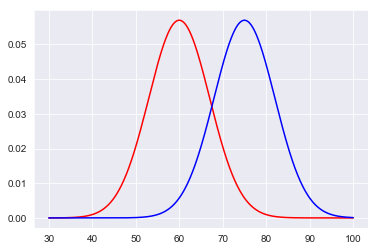

In [2]:
from scipy.stats import norm

mean = 60
# N.B. Here we assume that we know the pop stddev. 
stdev = 7

normal = norm(loc = mean, scale = stdev) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(30, 100,1000)        
y = normal.pdf(x)
ax.plot(x,y, color = 'r')

mean = 75
stdev = 7

normal = norm(loc = mean, scale = stdev) 
x = np.linspace(30, 100,1000)        
y = normal.pdf(x)
ax.plot(x,y, color='b')

plt.show()

Now suppose that we take a random sample of hospitalised COVID patients and observe their age.

Our sample tells us that the average age of patients in the sample is 70. 

Let us include this statistic in the visualisation.

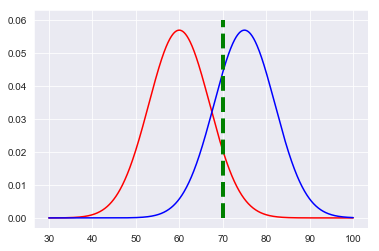

In [3]:
from scipy.stats import norm

mean = 60
stdev = 7

normal_60 = norm(loc = mean, scale = stdev) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(30, 100,1000)        
y = normal_60.pdf(x)
ax.plot(x,y, color = 'r')
#plt.plot([mean, mean], [0, 0.06], 'k--', lw=4, color='r')

mean = 75
stdev = 7

normal_75 = norm(loc = mean, scale = stdev) 
x = np.linspace(30, 100,1000)        
y = normal_75.pdf(x)
ax.plot(x,y, color='b')

plt.plot([70, 70], [0, 0.06], 'k--', lw=4, color='g')
plt.show()

Let's now compute how much of the data is captured under the blue model and how much under the red model if we have a sample mean of 70. 

In [4]:
from sklearn.metrics import auc

x = np.linspace(30, 70, 1000)        
y = normal_75.pdf(x)

print('The AUC for the blue model is: ', auc(x,y))

The AUC for the blue model is:  0.23752586397420858


Thus, for the blue model (our friend's claim), the sample mean is in the top 23% of possible observations for the mean.

Now let's compute the area under the curve for our model. 

In [5]:
x = np.linspace(70, 120, 1000)        
y = normal_60.pdf(x)

print('The AUC for the red model is: ', auc(x,y))

The AUC for the red model is:  0.07656460066780488


As such, this specific sample mean of 70 is more likely to come up under the blue model (our friend's model) than under the red model (our model) as it is included in the top 23% of values, whereas in our model it is only in the top 7%. 

Having discussed this, we can now move one step further and talk about the p-value. 

### The p-value: Introduction

Suppose that we decide that we want to test the following statement:

* The average age of COVID patients who end up in the hospital is about 75.

This statement provides us with the following model:

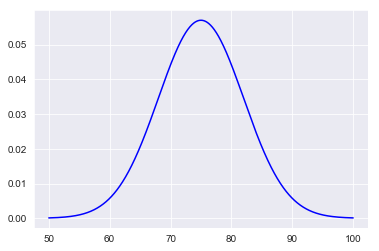

In [6]:
from scipy.stats import norm

mean = 75
stdev = 7

normal = norm(loc = mean, scale = stdev) 
fig, ax = plt.subplots(1, 1)

normal_75 = norm(loc = mean, scale = stdev) 
x = np.linspace(50, 100,1000)        
y = normal_75.pdf(x)
ax.plot(x,y, color='b')

plt.show()

Suppose that we will now draw 4 random samples from the population.

Recall that the distribution of sample means is normally distributed so we expect it to take on values on the blue curve.

Say that we draw 4 samples with the following values for the sample means:

* $\mu_{1}$: 80
* $\mu_{2}$: 76
* $\mu_{3}$: 83
* $\mu_{4}$: 69

Let us now plot these values in our model.

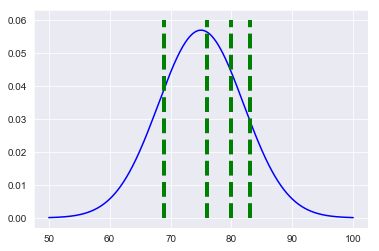

In [7]:
mean = 75
stdev = 7

normal = norm(loc = mean, scale = stdev) 
fig, ax = plt.subplots(1, 1)

normal_75 = norm(loc = mean, scale = stdev) 
x = np.linspace(50, 100,1000)        
y = normal_75.pdf(x)
ax.plot(x,y, color='b')

plt.plot([76, 76], [0, 0.06], 'k--', lw=4, color='g')
plt.plot([80, 80], [0, 0.06], 'k--', lw=4, color='g')
plt.plot([83, 83], [0, 0.06], 'k--', lw=4, color='g')
plt.plot([69, 69], [0, 0.06], 'k--', lw=4, color='g')

plt.show()

On the basis of the samples (i.e. our data), it seems that our model is pretty good at 'predicting' the outcome for the sample means.

Let us now look at another model.

Suppose that we assume the following:

* The average age of COVID patients who end up in the hospital is  50.

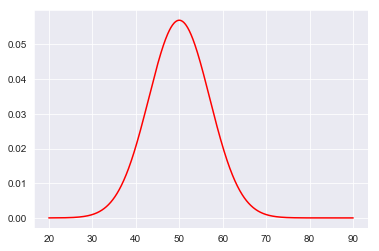

In [8]:
mean = 50
stdev = 7

normal = norm(loc = mean, scale = stdev) 
fig, ax = plt.subplots(1, 1)

normal_75 = norm(loc = mean, scale = stdev) 
x = np.linspace(20, 90,1000)        
y = normal_75.pdf(x)
ax.plot(x,y, color='r')

plt.show()

Again, we will draw 4 samples from the population and assume that that we get the following outcomes:

* $\mu_{1}$: 79
* $\mu_{2}$: 77
* $\mu_{3}$: 64
* $\mu_{4}$: 72

As before, we will include these values in our model.

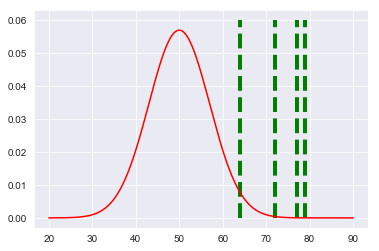

In [9]:
mean = 50
stdev = 7

normal = norm(loc = mean, scale = stdev) 
fig, ax = plt.subplots(1, 1)
normal_75 = norm(loc = mean, scale = stdev) 
x = np.linspace(20, 90,1000)        
y = normal_75.pdf(x)

plt.plot([79, 79], [0, 0.06], 'k--', lw=4, color='g')
plt.plot([77, 77], [0, 0.06], 'k--', lw=4, color='g')
plt.plot([64, 64], [0, 0.06], 'k--', lw=4, color='g')
plt.plot([72, 72], [0, 0.06], 'k--', lw=4, color='g')

ax.plot(x,y, color='r')
plt.show()

As can be seen, under the red model, it is highly unlikely that we will get sample means that are located on the right tail of the curve. 

In other words, these values are too extreme according to our model so we would not expect them to see so frequently.  

This tells us that our model is likely to be wrong and we can 'reject' this model -- **this is how we reject the null hypothesis.** 

### The p-value: Quantifying Extremeness 

The way we quantify this 'extremeness' is by the p-value.

The p-value is nothing more than the n% area under the curve of extreme values. 

We can choose the p-value ourselves. For instance, I can say that when my sample mean is within the 5% most extreme values, I can reject the null hypothesis. 

The easiest way to do this is by computing a cut-off value to determine at which point the top 5% of most extreme will start. Then we can see if our sample mean is located on the left or the right side of that cut-off value. 

**Important:** Taking a cut-off value of 0.05 - which is often called **alpha or the critical value** - is similar to taking the 5% quantile for either the left or right tail **or** 2 x 2.5% quantiles on both tails. 

Let's see what a p-value looks like for a standard normal curve.

In [10]:
normal = norm(loc = 0, scale = 1) 

We can now compute the cut-off value using the ppf method.  

In [11]:
# Percent point function (inverse of cdf) at q of the given RV.
alpha = 1 - 0.05
alpha = normal.ppf(alpha)
print(alpha)
# confirm with cdf
p = normal.cdf(alpha)
print(1 - p)

1.6448536269514722
0.050000000000000044


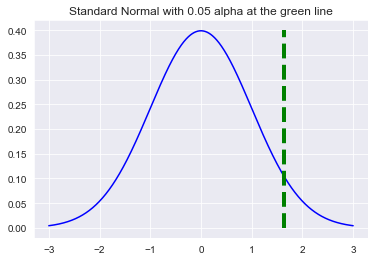

In [12]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        
y = normal.pdf(x)
ax.plot(x,y, color='b')

plt.plot([alpha, alpha], [0, 0.4], 'k--', lw=4, color='g')
plt.title('Standard Normal with 0.05 alpha at the green line')
#plt.fill_between(x,y, where = (x<=z) & (x>=-z), color='r')

plt.show()

We can now identify the top 5% highest values in the area on the right side of the green line. 

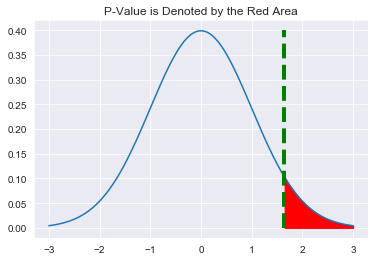

In [13]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)     
y = normal.pdf(x)
ax.plot(x,y)
plt.plot([alpha, alpha], [0, 0.4], 'k--', lw=4, color='g')
plt.fill_between(x,y, where = x >= alpha, color='r')

plt.title('P-Value is Denoted by the Red Area')
plt.show()


We can also compute the area under the curve for this p-value to be sure that it really is 5% of the data.

In [14]:
x = np.linspace(alpha,50,1000)        
y = norm.pdf(x)

print('The AUC for the red model is: ', auc(x,y))

The AUC for the red model is:  0.05003312182035478


We can also get the p-value for 5% on both extremes (i.e. 2.5% on the left tail and 2.5% on the right tail).

In [17]:
# retrieve value <= probability
alpha_left = 0.025
alpha_left = normal.ppf(alpha_left)
print('Alpha Left Tail: ', alpha_left) 

alpha_right = 1 - 0.025
alpha_right = normal.ppf(alpha_right)
print('Alpha Right Tail: ', alpha_right) 

# confirm with cdf
p = normal.cdf(alpha_right)
print((1 - p) * 2)  

Alpha Left Tail:  -1.9599639845400545
Alpha Right Tail:  1.959963984540054
0.050000000000000044


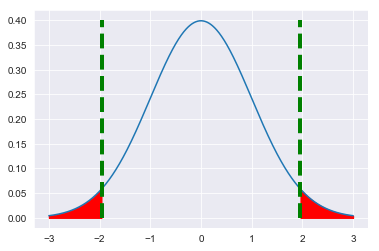

In [18]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        # Return evenly spaced numbers over a specified interval.
y = normal.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= alpha_right, color='r')
plt.fill_between(x,y, where = x <=alpha_left, color='r')
plt.plot([alpha_right, alpha_right], [0, 0.4], 'k--', lw=4, color='g')
plt.plot([alpha_left, alpha_left], [0, 0.4], 'k--', lw=4, color='g')

plt.show()


Let's also verify this a second time using the auc method. Note that we have to multiple by 2 here. 

In [19]:
x = np.linspace(alpha_right,50,1000)        
y = normal.pdf(x)

print('The AUC for the red model is: ', auc(x,y) * 2)

The AUC for the red model is:  0.05004414751896414


However, if we want to be really sure, we can also use a much smaller p-value of 1%.

In [21]:
# retrieve value <= probability
alpha_left = 0.005
alpha_left = normal.ppf(alpha_left)
print('Alpha Left Tail: ', alpha_left) 

alpha_right = 1 - 0.005
alpha_right = normal.ppf(alpha_right)
print('Alpha Right Tail: ', alpha_right) 

# confirm with cdf
p = normal.cdf(alpha_right)
print((1 - p) * 2)   

Alpha Left Tail:  -2.575829303548901
Alpha Right Tail:  2.5758293035489004
0.010000000000000009


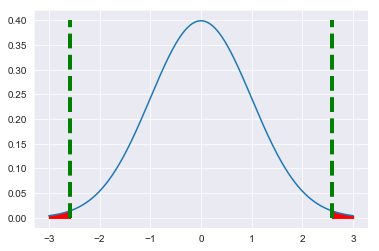

In [22]:
normal = norm(loc = 0, scale = 1) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(-3,3,1000)        # Return evenly spaced numbers over a specified interval.
y = normal.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= alpha_right, color='r')
plt.fill_between(x,y, where = x <=alpha_left, color='r')
plt.plot([alpha_right, alpha_right], [0, 0.4], 'k--', lw=4, color='g')
plt.plot([alpha_left, alpha_left], [0, 0.4], 'k--', lw=4, color='g')

plt.show()

In [23]:
x = np.linspace(alpha_right,50,1000)        
y = normal.pdf(x)
 
print('The AUC for the red model is: ', auc(x,y) * 2)

The AUC for the red model is:  0.010013987355591971


**Important:** It depends on the type of problem which 'type' of p-value you would like to use. 

For instance, if you're interested in finding out whether a new study resource will increase GPAs, you're probably going to focus on the right side of the distribution (i.e. the higher extreme values) and not on the other end of the distribution.  

## Hypothesis Testing in Practice

Let's now look at how to go about hypothesis testing in practice. 

### Example: Fuel Efficiency in 2008 Audi Models (Stdev Known)


Suppose that we have a car manufacturer (Audi) telling us that their model 2008 cars on average use only 16.6 barrels per year. We are a bit sceptical and would therefore like to find out if this is really the case or whether it is more than 16.6 barrels p/y.



In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/vehicles.csv')

In [25]:
sample_data = data[(data.Make == 'Audi') & (data.Year==2008)]['Fuel Barrels/Year']

#### 1. Specify the Alternative Hypothesis

We specify the alternative hypothesis for our problem as follows: 



*   Ha: the average fuel efficiency for Audi's in 2008 is > 16.6. 



#### 2. Specify the Null Hypothesis

Our null hypothesis is the following:

*  h0 $=$ 16.6

#### 3. Set Critical Value

*   $\alpha$ = 0.05.


In [26]:
alpha = 0.05

#### 4. Compute the z-score


We will now compute the z-score. We need to know the z-score to determine if it is higher than $\alpha$. Also, we know that $\sigma$ is 2.5.

$$z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}},$$

where $\bar{X}$ is the mean of the sample, $\mu$ the assumed population mean, $\sigma$ the population standard deviation and $n$ denotes the size of the sample. 

In [27]:
# Terms
mu = 16.6
x_bar = sample_data.mean()
sigma = 2.5
marg_error = sigma / len(sample_data)

In [28]:
z = (x_bar - mu) / marg_error
print(z)

21.42955547550839


#### 5. Calculate the p-value


We now know that 21.4 is our z-score value. Is this statistically significant? In other words, is it within 5% of the most extreme values we would observe?

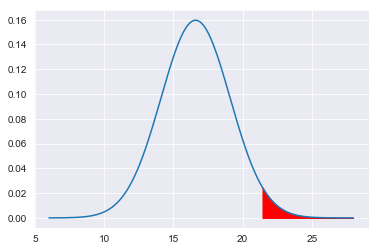

In [37]:
normal = norm(loc = mu, scale = sigma) 
fig, ax = plt.subplots(1, 1)
x = np.linspace(6,28,1000)     
y = normal.pdf(x)
ax.plot(x,y)
plt.fill_between(x,y, where = x >= z, color='r')
plt.show()

As can be seen, the a value of 21.4 is quite likely to be in the extreme region under our model.

However, we will have to determine if this is also really the case by looking at whether this value is larger than $\alpha.$

We can now compute the $\alpha$ value **for this particular distribution**. The $\alpha$ will tell us where the cut-off value lies.

In [30]:
alpha = 1 - alpha 
alpha = normal.ppf(alpha)
print(alpha)
# confirm with cdf

20.71213406737868


Again, this $\alpha$ tells us that 5% of the data with the most extreme value lies on the right side of value.

Since $t$ > $\alpha$ (21.4 > 20.7), we know that a mean of 16.6 is highly unlikely. 

When computing the p-value for this z-score, we will see that it is about 0.02.

In [31]:
# Total percentages of values > larger than z
p = normal.cdf(z)
print(1 - p)

0.026690728111357198


This, of course, means that this sample mean belongs to the top 2% of extreme values we would observe if the true mean were 16.6 barrels p/y.

Bad news for us, the car manufacturer and the environment. 

#### 6. and 7. Compare the p-value to $\alpha$ and reject or confirm the Null Hypothesis. 


At the beginning, we said that we would reject the null hypothesis if the p-value for that hypothesis was smaller than the critical value.

*  **H0: $\mu = $ 16.6**  
*  H1: $\mu >  $ 16.6 

To reiterate, since the z-statistic (21.4) exceeds the critical value (20.7), we can reject the hypothesis.

**Important:** This is the same as saying that we have a p-value < 0.05.

### Example: Average BPM in Music


Let's now look at an example where we do not know the population standard deviation.

In [38]:
data = pd.read_csv('data_by_artist.csv')

In [39]:
data.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


Using this data, we want to verify the claim that the average tempo in data from the real world is not 114 BPM.

Thus, we want to show that assuming the opposite leads to an absurdity. 

In [40]:
bpm = data['tempo']

In [41]:
bpm.max()

217.743

In [42]:
bpm.min()

0.0

#### 1. Specify the Alternative Hypothesis

We specify the alternative hypothesis for our problem as follows: 



*   Ha: the average BPM for music $\neq$ 114.  



#### 2. Specify the Null Hypothesis

Our null hypothesis is the following:

*  H0: the average BPM for music $=$ 114.  

Note that this requires us to look at both sides of the distribution. 

In other words, we're interested in whether 114 BPM may be significantly different from the true mean, not whether it is necessarily larger or smaller. 

#### 3. Set Critical Value

Again, we will set alpha to:

*   $\alpha$ = 0.05.

We will only reject our null hypothesis if we end up in the lowest top 2.5% of the data or the highest 2.5% of the data.



#### 4. Compute the t-score 


In the previous example, we were able to compute the z-score. However, as we have seen in the previous lecture, when dealing with an unknown $\sigma$, we need to use Student's t-distribution and hence a t-test. 

The t-test can be computed as follows:

$$t = \frac{\bar{X} - \mu}{\frac{s}{\sqrt{n}}},$$

where $s$ denotes the standard deviation of the sample $\bar{X}$ the mean of the sample, $\mu$ the (assumed) population mean and $n$ the sample size.

In [44]:
# Terms
bpm_mean = bpm.mean()
mu = 114
sample_stdev = bpm.std()
standard_error = sample_stdev / np.sqrt(len(bpm))

In [45]:
t_value = (bpm_mean - mu) / standard_error
print(t_value)

9.5150598269653


We now have a t-statistic. Let us now compute see if how extreme this value is.

#### 5. Calculate the p-value


In [46]:
from scipy.stats import t

df = len(bpm) - 1
mean, var, skew, kurt = t.stats(df, moments='mvsk')

We can compute the alpha level of (0.05 / 2) = 0.025 (recall, it is two-sided!) as follows:

In [47]:
# retrieve value <= probability
alpha = 0.025
alpha = 1 - alpha
alpha = t.ppf(alpha, df)
print(alpha)
# confirm with cdf

1.9600498778573614


Since our value for t (9.5) is much higher than the critical value of 1.96, we can reject the null hypothesis.

Let us now also compute the p-value. We can also use the ttest method from the scipy library.

In [48]:
t, p = ttest_1samp(bpm, 114)
print(t)
print(p)

9.5150598269653
1.9588185051895238e-21


#### 6. and 7. Compare the p-value and reject or confirm the Null Hypothesis. 


Since the p-value is extremely low, we can reject the following null hypothesis:

- H0: the average BPM for music $=$ 114. 

### Example: US Presidents

As a bonus, let's look at our data set of presidents once more. We will work with a sample of 20 presidents. 

In [49]:
presidents = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/presidents_heights.csv')
heights = presidents['height(cm)']
sample = heights.sample(n=20)

My claim is here is that the average height of US presidents is *not* 178 cm. My null hypothesis is therefore:

- $H0:$ $\mu_{presidents} = 178$

Also, I assume that we do not know $\sigma$ this time.

In [50]:
sample_mean = sample.mean()
mu = 178
sample_stdev = sample.std()
standard_error = sample_stdev / np.sqrt(len(sample))

In [51]:
t_value = (sample_mean - mu) / standard_error
print(t_value)

0.22760862668200524


In [52]:
from scipy.stats import t

df = len(sample) - 1
mean, var, skew, kurt = t.stats(df, moments='mvsk')

In [53]:
# retrieve value <= probability
alpha = 1 - 0.025
alpha = t.ppf(alpha, df)
print(alpha)
# confirm with cdf

2.093024054408263


In [54]:
p = t.cdf(t_value, df)
print(1-p)

0.411190924469641


#### A Quick Computation

In [56]:
t, p = ttest_1samp(sample, 178)
print(t)
print(p)

0.2276086266820052
0.8223818489392822


Thus, as indicated by the high p-value, it is reasonable to assume that the average height for US presidents is 178.

In other words, we cannot reject our null hypothesis.

## Summary 

In this lesson we learnt:

- What hypotheses are;

- How we can quantify statistical significance;

- What critical values and p-values are;

- How we could use hypothesis testing in real life case. 

# Appendix 

## Types of Alternative Hypotheses 

There are two types of alternative hypotheses: one-sided and two-sided. One-sided alternative hypothesis (a.k.a. directional hypothesis) is used to determine whether the population average differs from the hypothesized value in a specific direction (larger but not smaller than, or vice versa). **In contrast, two-sided alternative hypothesis (a.k.a. nondirectional hypothesis) is used to determine whether the population average is either greater than or less than the hypothesized value.**

Why we differentiate these two types? Because sometimes we are not interested in whether the population average is larger or smaller than the hypothesized value. We only care if they are different. In this case, we use two-sided instead of one-sided hypothesis. However, in case we care about which is the case, we use one-sided hypothesis.

For instance, let $k$ be some value and our hypothesis that $\mu = k$. Thus,

* H0: μ = k	

Then a one-sided Alternative Hypothesis would look like this:

* H1: μ > k *OR*
* H1: μ < k	

On the other hand, a two-sides Alternative Hypothesis would look like this:

* H1: μ ≠ k

https://machinelearningmastery.com/statistical-hypothesis-tests/ 

The idea of a two-sides Alternative Hypothesis is that we no longer look at only one region to reject or accept or test, but to both the left region and right region. 

![alt text](https://camo.githubusercontent.com/1a8495533cd8c50c73ef2b881d1aaab7d6c00fa2/68747470733a2f2f736c696465706c617965722e636f6d2f736c6964652f393332353539392f32382f696d616765732f362f54797065732b6f662b4879706f7468657369732b54657374732e6a7067)


By default, the ttest_1samp method carries out a two-sides hypothesis test. 

## Test Assumptions

In order to conduct a hypothesis test we need to meet certain assumptions:

1. Our observations must be **independent** of each other. For example, if we have people who live in the same household participating in a medical trial, they might be exposed to the same environmental conditions or eat the same food. This can bias our results.
2.   Normality of data - We assume that the sample is derived from a normally distributed data.
3.   Adequate sample size. In order to perform a test using the normal distribution and not approximate to the t distribution, our sample size must be greater than 30.
4.   In order to use the normal distribution for our hypothesis test, we must assume the population standard deviation is known. If the population standard deviation is not known, then we use the t-distribution for the hypothesis test.

Please also be careful for sampling bias:

*   **Sampling Bias** - Sampling bias occurs when some members of the intended population are less likely to be included than others in the selected sample. Say we collected the data at Wall Street at 10AM on Monday. Significant bias can be introduced due to the flaws of the data collection because people who appear at Wall Street at that specific time are most likely working professionals in the financial industry. The sample data will miss a lot of people from other industries and other NYC neighborhoods. Consequently, the selected sample is not a good representation of NYC residents.



## Summary

In this lesson we learned how to perform a hypothesis test. To do this, we had to introduce a large number of terms: population, sample, null hypothesis, alternative hypothesis, test statistic, p-value, and confidence interval. We then showed how we can use our test to come up with a conclusion for a real-life scenario and learned how to do this with Python.